# Analysis on Personal Spending

### Import bank transactions
### Extrapolate into the future

notes: 
Opting to split between loan and transaction accounts believe the latter can be analysed to best analyse spending


Show spending trends by category
Identify spending trends - ie patterns etc
Monitor categories for changes - ie increase month on month

What question would I like to answer

Where are we spending our money?
What categories?
Is our expenditure increasing/decreasing over time?
Are there any spending patterns/behaviours that are of concern?  (e.g. we spend more on takeout close to payday (not ideal))

In [160]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
#issues with two files (credit card + savingss) having values containing commas, breaking out the value to multiple columns and causing errors
#manually opening the CSV files and correctin - would be to automate the correctin of these catw
#ideally I'd export in a different format, or rpelace the commas before epxortin  but neither are possible in this case
#added a line to test github branching

#folder containing one or more csv file to import
inputfolder = 'C:\\Users\\mcleodb\\Documents\\SpendFiles 20210405\\'
os.chdir(inputfolder)
files = os.listdir()
templist = []
#import each file to temp dataframe and append to the main one - adding column to capture the source
for i in files:
    loc = inputfolder + i
    print('import file: ',loc)
    tempdf = pd.read_csv(loc)
    tempdf['sourcefile'] = i
    templist.append(tempdf)
    dfraw = pd.concat(templist)

import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\creditcard trans050421.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\export.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\loan fixed trans050421.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\loan variable trans050421.csv
import file:  C:\Users\mcleodb\Documents\SpendFiles 20210405\savings trans050421.csv


In [181]:
dfraw.head()

,Date,Description,Debit,Credit,Category,SubCategory,sourcefile,Unnamed: 0,amount,date,charge,outgoing,incoming,Balance,Debit_neg
0,20210319.0,Ness Labs London Gb Frgn A...,11.62,NaN,Entertainment & Recreation,TV Movies Music Games,creditcard trans050421.csv,NaN,-11.62,NaN,NaN,NaN,NaN,NaN,-11.62
1,20210401.0,Bws Liquor 6468 Lisarow Nsw Au,38.00,NaN,Food & Beverage,Beverages,creditcard trans050421.csv,NaN,-38.00,NaN,NaN,NaN,NaN,NaN,-38.00
2,20210401.0,Woolworths 1574 Lisarow Nsw Au,27.75,NaN,Food & Beverage,Food & Groceries,creditcard trans050421.csv,NaN,-27.75,NaN,NaN,NaN,NaN,NaN,-27.75
3,20210401.0,Woolworths 1574 Lisarow Nsw Au,57.85,NaN,Food & Beverage,Food & Groceries,creditcard trans050421.csv,NaN,-57.85,NaN,NaN,NaN,NaN,NaN,-57.85
4,20210401.0,The Grange Hotel Wyoming Au,36.00,NaN,Food & Beverage,Beverages,creditcard trans050421.csv,NaN,-36.00,NaN,NaN,NaN,NaN,NaN,-36.00


In [183]:
#data cleaning - formatting dates, and consolidating debit/credit to single column


#convert debits to neg amount and add as separate column
# dfraw['Debit_neg'] = dfraw['Debit'] * -1
#OR keep debits as positive amount and add as separate column
dfraw['Debit_neg'] = dfraw['Debit'] * -1


dfraw['amount'] = dfraw[['Debit_neg','Credit']].sum(axis=1)

df_all = dfraw[['Description','Debit','Credit', 'amount', 'Category',
       'SubCategory', 'sourcefile']].copy() 
df_all['date'] = pd.to_datetime(dfraw['Date'],format=r'%Y%m%d')

#I like the idea of having a column to denote if charge is a debit or credit
df_all['charge'] = df_all.amount.apply(lambda x: 'debit' if x <= 0 else 'credit')

#filter after 1/5/20 to exclude some initial loan transfers which are not meaningful for this analysis
df_all = df_all[df_all['date'] >= '2020-05-01']
df_all.to_csv('export.csv')

#create a subset which excludes the loan accounts
df_spend = df_all[df_all['sourcefile'].str.match('sav')]
df_spend = df_spend.append(df_all[df_all['sourcefile'].str.match('credit')])
#on this spend subset - make the date the index (so we can resample / agg by date)
df_spend.set_index('date', inplace=True)    


In [193]:
#TODO
#PLOT OUTGOING SPEND BY CATEGORY ()
#PLOT OUTGOING SPEND BY CATEGORY MONTHLY



' '

In [100]:
# #TODO - add in some calcs
# #simple moving average for monthly debit spending
# df_spend['Debit_SMA_1M'] = df_spend[df_spend['charge']=='debit'].resample('M').sum().rolling(window=1).mean()
# df_spend['Debit_SMA_2M'] = df_spend.amount[df_spend['charge']=='debit'].resample('M').sum().rolling(window=2).mean()
# df_spend['Debit_SMA_3M'] = df_spend.amount[df_spend['charge']=='debit'].resample('M').sum().rolling(window=3).mean()

'\nidentify spending trends - takeout on certain days\nmore discretionary spending at certain times of day/week/month\n\n'

In [172]:
#include some DQ checks
df_spend['sourcefile'].value_counts()

savings trans050421.csv       906
creditcard trans050421.csv    386
Name: sourcefile, dtype: int64

<AxesSubplot:xlabel='date'>

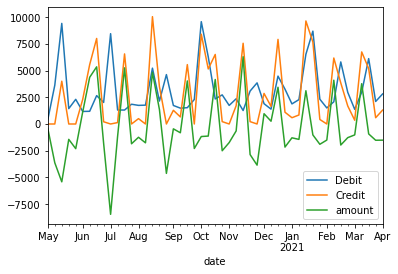

In [194]:
#weekly debit/credits on savings & cc account
df_spend.resample('W').sum().plot()

In [137]:
# # plot it
# plt.figure(figsize=[15,10])
# plt.grid(True)
# plt.plot(df_spend['Debit_SMA_1M'], label = 'SMA 1 Month (Debits')    
# plt.legend(loc=1)